In [ ]:
%matplotlib inline
#%matplotlib nbagg
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import xarray
import glob
import matplotlib.colors as colors
from matplotlib import cm, animation
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
import palettable
from palettable.colorbrewer.sequential import YlOrRd_9,RdPu_9
from palettable.colorbrewer.diverging import RdYlGn_10_r
from wrf import getvar, ALL_TIMES
from netCDF4 import Dataset
from matplotlib.animation import FuncAnimation


#### Load data

In [2]:
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year=2003
file = path+'post_processing/dif.energy.'+str(year)+'.bigclearing.ndays.nc'
print(file)
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]

### LU_INDEX
file = path+'Xingu_2005_mediumclearing/3Dfields_d01_2005-11-10_00:00:00'
print(file)
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    luindex=ds1['LU_INDEX'][0,:,:]

/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2003.bigclearing.ndays.nc
/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/Xingu_2005_mediumclearing/3Dfields_d01_2005-11-10_00:00:00


### 1. Plot the all the hourly data of one individual year

In [ ]:
fig = plt.figure(figsize=(5,5))#,sharex=True,sharey=True)
ax = plt.axes()
# initialization function: plot the background of each frame
def init():
    #ax.contourf([],[],[],cmap='PiYG_r',levels=np.arange(-150,151,30))
    im=ax.contourf(lons,lats,ds['LH'][0,:,:],cmap='PiYG_r',levels=np.arange(-150,151,30),extend='both')
    fig.colorbar(im,ax=ax)
    return ax,

# animation function.  This is called sequentially
def animate(ii):
    im=ax.contourf(lons,lats,ds['LH'][ii,:,:],cmap='PiYG_r',levels=np.arange(-150,151,30),extend='both')
    ax.contour(lons,lats,luindex,colors='b',linewidths=0.5,levels=[11.9,12.1])
    #plt.colorbar(im,ax=ax)
    ax.set_title('Latent Heat; Day '+str(int(ii/24)+1) + '; Local time = '+str(np.mod(ii,24)-3))
    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')
    
    #plt.colorbar()
    return ax,

plt.rcParams['animation.ffmpeg_path'] = '/ocean/projects/atm200007p/xjliu/miniconda3/bin/ffmpeg'
anim = FuncAnimation(fig, animate, interval=1,frames=240,repeat=False,init_func=init)
anim.save('LH_year'+str(year)+'.mp4',fps=2, extra_args=['-pix_fmt', 'yuv420p'])



### 1. Plot the the noon data of all 10 days of one individual year

/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2001.mediumclearing.ndays.nc
ok
/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2002.mediumclearing.ndays.nc
ok
/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2003.mediumclearing.ndays.nc
ok
/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2004.mediumclearing.ndays.nc
ok
/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/dif.energy.2005.mediumclearing.ndays.nc
ok


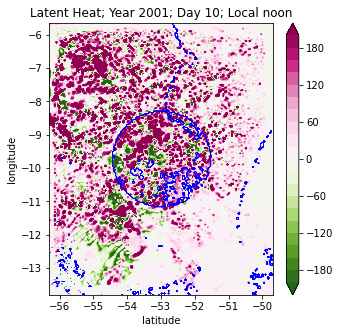

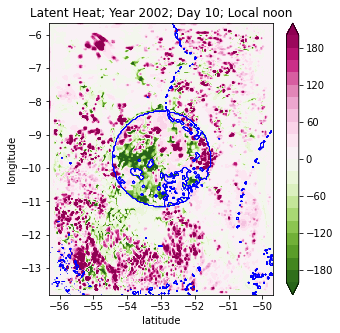

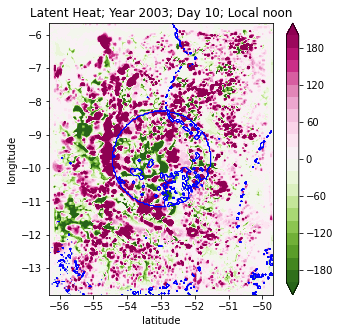

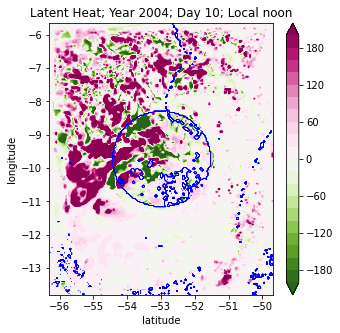

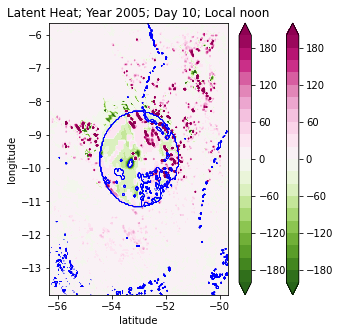

In [3]:
for year in range(2001,2006):
    
    # read data
    file = path+'post_processing/dif.energy.'+str(year)+'.mediumclearing.ndays.nc'
    print(file)
    with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
        print('ok')

    fig = plt.figure(figsize=(5,5))#,sharex=True,sharey=True)
    ax = plt.axes()
    # initialization function: plot the background of each frame
    def init():
        im=ax.contourf(lons,lats,ds['LH'][15,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20),extend='both')
        fig.colorbar(im,ax=ax)
        return ax,

    # animation function.  This is called sequentially
    def animate(ii):
        im=ax.contourf(lons,lats,ds['LH'][ii*24+15,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20),extend='both')
        ax.contour(lons,lats,luindex,colors='b',linewidths=0.5,levels=[11.9,12.1])
        #plt.colorbar(im,ax=ax)
        ax.set_title('Latent Heat; Year '+str(year)+'; Day '+str(ii+1) + '; Local noon')
        ax.set_xlabel('latitude')
        ax.set_ylabel('longitude')

        #plt.colorbar()
        return ax,

    plt.rcParams['animation.ffmpeg_path'] = '/ocean/projects/atm200007p/xjliu/miniconda3/bin/ffmpeg'
    anim = FuncAnimation(fig, animate, interval=1,frames=10,repeat=False,init_func=init)
    anim.save('LH_year'+str(year)+'_LocalNoon_mediumClearing.mp4',fps=1, extra_args=['-pix_fmt', 'yuv420p'])



### 1. Plot the animation of all available years. 

In [ ]:
year=2002

file = path+'post_processing/dif.energy.'+str(year)+'.bigclearing.ndays.nc'
print(file)
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]


fig = plt.figure(figsize=(5,5))#,sharex=True,sharey=True)
ax = plt.axes()
# initialization function: plot the background of each frame
def init():
    #ax.contourf([],[],[],cmap='PiYG_r',levels=np.arange(-150,151,30))
    im=ax.contourf(lons,lats,ds['LH'][0,:,:],cmap='PiYG_r',levels=np.arange(-150,151,30),extend='both')
    fig.colorbar(im,ax=ax)
    return ax,

# animation function.  This is called sequentially
def animate(ii):
    im=ax.contourf(lons,lats,ds['LH'][ii,:,:],cmap='PiYG_r',levels=np.arange(-150,151,30),extend='both')
    ax.contour(lons,lats,luindex,colors='b',linewidths=0.5,levels=[11.9,12.1])
    #plt.colorbar(im,ax=ax)
    ax.set_title('Latent Heat; Day '+str(int(ii/24)+1) + '; Local time = '+str(np.mod(ii,24)-3))
    ax.set_xlabel('latitude')
    ax.set_ylabel('longitude')
    
    #plt.colorbar()
    return ax,

plt.rcParams['animation.ffmpeg_path'] = '/ocean/projects/atm200007p/xjliu/miniconda3/bin/ffmpeg'
anim = FuncAnimation(fig, animate, interval=1,frames=240,repeat=False,init_func=init)
#anim.save('test.gif', writer='imagemagick',fps=1)
#anim.save('basic_animation.mp4', fps=1)

#anim.save('basic_animation.mp4',fps=30, extra_args=['-vcodec', 'libx264'])
anim.save('LH_year'+str(year)+'.mp4',fps=1, extra_args=['-pix_fmt', 'yuv420p'])


### Check LH of the control

In [ ]:
### 2002-2010
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'Xingu_'+str(year)+'/energyflux_d01_'+str(year)+'-11-09_00:00:00'
    print(file)
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][15,:,:],cmap='jet',levels=np.arange(0,701,100))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


In [ ]:
### 2011-2020
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
for ii,year in enumerate(range(2011,2020)):
    file = path+'Xingu_'+str(year)+'/energyflux_d01_'+str(year)+'-11-08_00:00:00'
    print(file)
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][15,:,:],cmap='jet',levels=np.arange(0,701,100))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


### Check HFX of the control

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
for ii,year in enumerate(range(2011,2020)):
    file = path+'Xingu_'+str(year)+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['HFX'][15,:,:],levels=np.arange(0,301,30))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


In [ ]:
### Rnet
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
for ii,year in enumerate(range(2011,2020)):
    file = path+'Xingu_'+str(year)+'_bigclearing/energyflux_d01_'+str(year)+'-11-10_00:00:00'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['HFX'][15,:,:]+ds['LH'][15,:,:],levels=np.arange(0,1001,100))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


### Check TSK

In [ ]:
### 201407
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2011,2010)):
    file = path+'TSK.'+str(year)+'.obs.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
        
    im=axes[ii].contourf(lons,lats,ds['TSK'][15,:,:]-273.15,cmap='YlOrRd',levels=np.arange(20,41,2))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


In [ ]:
### 201407
fig,axes = plt.subplots(3,3,figsize=(12,10),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'TSK.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
        
    im=axes[ii].contourf(lons,lats,ds['TSK'][15,:,:]-273.15,cmap='YlOrRd',levels=np.arange(20,41,2))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])


### Change in LH of all the big clearing exps.

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.energy.'+str(year)+'.bigclearing.multidaymean.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.energy.bigclearing.multiday.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
im=axes[8].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,20))
fig.colorbar(im,ax=axes[8])
axes[8].set_title('Average of the above')
#for ii in range(9):
    #axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


#### Changes in LH of each year

In [ ]:
fig,axes = plt.subplots(4,5,figsize=(15,12),sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.energy.bigclearing.multiday.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
        
years=np.concatenate((np.arange(2002,2010),np.arange(2011,2021)))
for ii,year in enumerate(years):
    im=axes[ii].contourf(lons,lats,ds['LH'][ii,16,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20))
    axes[ii].set_title('LH of Year '+str(year))

im=axes[18].contourf(lons,lats,ds['LH'][ii,16,:,:],cmap='PiYG_r',levels=np.arange(-200,201,20))
fig.colorbar(im,ax=axes[18])
axes[18].set_title('LH of Year '+str(year))

im=axes[19].contourf(lons,lats,ds['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-200,201,40))
fig.colorbar(im,ax=axes[19])
axes[19].set_title('Average of all')

#for ii in range(20):
#    axes[ii].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.5,12.5])


### How many ensemble members will be enough

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file = path+'dif.energy.bigclearing.multiday.all.nc'
with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]
        
for ii,jj in enumerate(np.arange(4,20,2)):
    im=axes[ii].contourf(lons,lats,ds['LH'][0:jj,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
    axes[ii].set_title('Average over '+str(jj)+' members')
    fig.colorbar(im,ax=axes[ii])

### Differences between big, medium, and small clearing. 

In [ ]:
fig,axes = plt.subplots(1,3,figsize=(13,4))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
file1 = path+'dif.energy.bigclearing.all.nc'
file2 = path+'dif.energy.mediumclearing.all.nc'
file3 = path+'dif.energy.smallclearing.all.nc'

with xarray.open_dataset(file1,decode_times=False,
                             mask_and_scale='True') as ds1:
    lats=ds['XLAT'][0,:,0]
    lons=ds['XLONG'][0,0,:]

with xarray.open_dataset(file2,decode_times=False,
                             mask_and_scale='True') as ds2:
    print('ok')
with xarray.open_dataset(file3,decode_times=False,
                             mask_and_scale='True') as ds3:
    print('ok')

im1=axes[0].contourf(lons,lats,ds1['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
im2=axes[1].contourf(lons,lats,ds2['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))
im3=axes[2].contourf(lons,lats,ds3['LH'][:,16,:,:].mean(axis=0),cmap='PiYG_r',levels=np.arange(-100,101,20))

fig.colorbar(im1,ax=axes[0])
fig.colorbar(im2,ax=axes[1])
fig.colorbar(im3,ax=axes[2])
axes[0].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[1].contour(lons,lats,lu_index2,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[2].contour(lons,lats,lu_index3,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[0].set_title('Change in LH at local noon',fontsize=14)

In [ ]:
### Change in daily-averaged LH
fig,axes = plt.subplots(1,3,figsize=(13,4))#,sharex=True,sharey=True)
axes = axes.ravel()   
im1=axes[0].contourf(lons,lats,ds1['LH'][:,:,:,:].mean(axis=0).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))
im2=axes[1].contourf(lons,lats,ds2['LH'][:,:,:,:].mean(axis=1).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))
im3=axes[2].contourf(lons,lats,ds3['LH'][:,:,:,:].mean(axis=1).mean(axis=0),cmap='PiYG_r',levels=np.arange(-30,30,5))

fig.colorbar(im1,ax=axes[0])
fig.colorbar(im2,ax=axes[1])
fig.colorbar(im3,ax=axes[2])

axes[0].contour(lons,lats,lu_index1,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[1].contour(lons,lats,lu_index2,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[2].contour(lons,lats,lu_index3,colors='b',linewidths=0.5,levels=[11.9,12.1])
axes[0].set_title('Change in daily-averaged LH',fontsize=14)

### Change in HFX of all the big clearing exps.

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.energy.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        lats=ds['XLAT'][0,:,0]
        lons=ds['XLONG'][0,0,:]
        
     
    im=axes[ii].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,10))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.energy.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-100,101,10))
    fig.colorbar(im,ax=axes[8])
    
#for ii in range(9):
    #axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


### Change in TSK of all the big clearing exps.

In [ ]:
fig,axes = plt.subplots(3,3,figsize=(12,10))#,sharex=True,sharey=True)
axes = axes.ravel()   

path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/post_processing/'
for ii,year in enumerate(range(2002,2010)):
    file = path+'dif.TSK.'+str(year)+'.bigclearing.nc'
    with xarray.open_dataset(file,decode_times=False,
                             mask_and_scale='True') as ds:
        print('ok')
     
    im=axes[ii].contourf(lons,lats,ds['TSK'][16,:,:],cmap='coolwarm',levels=np.arange(-5,6,1))
    axes[ii].set_title('Year '+str(year))
    fig.colorbar(im,ax=axes[ii])

file = path+'dif.TSK.bigclearing.ensmean.nc'
with xarray.open_dataset(file,decode_times=False,
                            mask_and_scale='True') as ds:
    print('ok') 
    im=axes[8].contourf(lons,lats,ds['TSK'][16,:,:],cmap='coolwarm',levels=np.arange(-5,6,1))
    fig.colorbar(im,ax=axes[8])
    
for ii in range(9):
    axes[ii].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])


### Change in Rnet

### Change in LH of a single year

In [ ]:
### load in the LU_INDEX
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day/'
year=2002
with xarray.open_dataset(path+'Xingu_'+str(year)+'_bigclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index1=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_mediumclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index2=ds['LU_INDEX'][0,:,:]
with xarray.open_dataset(path+'Xingu_'+str(year)+'_smallclearing/'+'/3Dfields_d01_'+str(year)+'-11-10_00:00:00',
                         decode_times=False,mask_and_scale='True') as ds:
    lu_index3=ds['LU_INDEX'][0,:,:]

In [ ]:
### 201407
fig,axes = plt.subplots(2,2,figsize=(10,8))#,sharex=True,sharey=True)
axes = axes.ravel()   

year=2003
path = '/ocean/projects/ees210014p/xjliu/Xingu_exp_10day'
file_obs = path+'/Xingu_'+str(year)+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_big = path+'/Xingu_'+str(year)+'_bigclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_medium = path+'/Xingu_'+str(year)+'_mediumclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'
file_small = path+'/Xingu_'+str(year)+'_smallclearing/'+'/energyflux_d01_'+str(year)+'-11-10_00:00:00'


print(file_obs)

with xarray.open_dataset(file_obs,decode_times=False,
                         mask_and_scale='True') as ds0:
    print('ok')
with xarray.open_dataset(file_big,decode_times=False,
                         mask_and_scale='True') as ds1:
    print('ok')
with xarray.open_dataset(file_medium,decode_times=False,
                         mask_and_scale='True') as ds2:
    print('ok')
with xarray.open_dataset(file_small,decode_times=False,
                         mask_and_scale='True') as ds3:
    print('ok')
     
im0=axes[0].contourf(lons,lats,ds0['LH'][16,:,:],cmap='jet')
im1=axes[1].contourf(lons,lats,ds1['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
im2=axes[2].contourf(lons,lats,ds2['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
im3=axes[3].contourf(lons,lats,ds3['LH'][16,:,:]-ds0['LH'][16,:,:],cmap='PiYG_r',levels=np.arange(-500,501,100))
axes[1].contour(lons,lats,lu_index1,'-k',linewidth=2,levels=[11,13])
axes[2].contour(lons,lats,lu_index2,'-k',linewidth=2,levels=[11,13])
axes[3].contour(lons,lats,lu_index3,'-k',linewidth=2,levels=[11,13])

fig.colorbar(im0,ax=axes[0])
fig.colorbar(im1,ax=axes[1])
fig.colorbar(im2,ax=axes[2])
fig.colorbar(im3,ax=axes[3])
axes[0].set_title('Control')
axes[1].set_title('Big Clearing')
axes[2].set_title('Medium Clearing')
axes[3].set_title('Small Clearing')